In [66]:
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np
# import random

In [67]:
g_bipartite = ig.Graph.Bipartite(
    [0, 0, 0, 0, 0, 1, 1, 1, 1],
    [(0, 5), (1, 6), (1, 7), (2, 5), (2, 8), (3, 6), (4, 5), (4, 6)]
)

assert g_bipartite.is_bipartite()

In [68]:
g_petersen = ig.Graph.Famous('Petersen')

In [69]:
g = g_bipartite

In [70]:
adj_matrix = g.get_adjacency()
eigenvalues = np.linalg.eigh(adj_matrix)[0]
eigenvectors = np.linalg.eigh(adj_matrix)[1]

smallest_eigenvector = eigenvectors[:, 0]

# indices of positive values in the smallest eigenvector
positive_indices = np.where(smallest_eigenvector > 0)[0]

# indices of negative values in the smallest eigenvector
negative_indices = np.where(smallest_eigenvector < 0)[0]

print(positive_indices)
print(negative_indices)

[0 1 2 3 4]
[5 6 7 8]


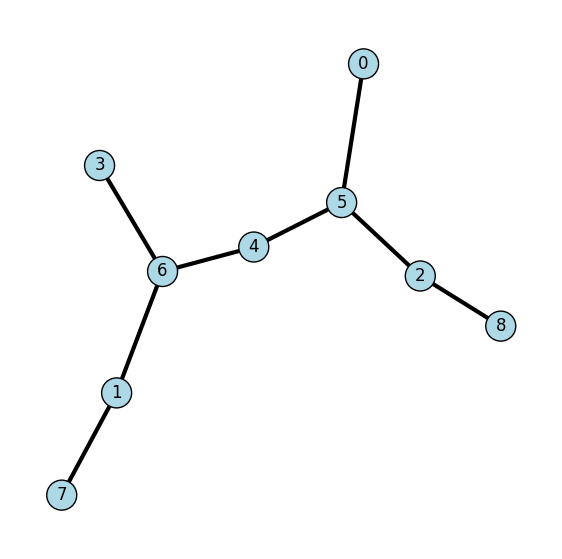

In [71]:
fig, ax = plt.subplots(figsize=(7, 7))
ig.plot(
    g,
    target=ax,
    # layout=g.layout_bipartite(),
    vertex_size=30,
    vertex_label=range(g.vcount()),
    vertex_color="lightblue",
    # vertex_color=["red" if i in positive_indices else "yellow" for i in range(g.vcount())],
    edge_width=[3],
    edge_color=["black"]
)

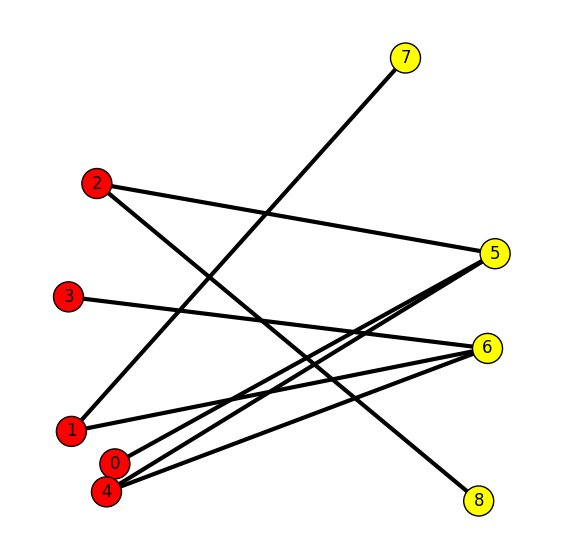

In [74]:
# g_layout = ig.Layout([(0,0), (1, 1), (0, 2), (1,3), (0,4), (0,5) , (0,6) , (1,7) , (0,8), (0,9)])
g_layout = ig.Layout([(0 + np.random.uniform(-0.2, 0.2), np.random.uniform(0, 10)) if i in positive_indices else (1 + np.random.uniform(-0.2, 0.2), np.random.uniform(0, 10)) for i in range(g.vcount())])

fig, ax = plt.subplots(figsize=(7, 7))
ig.plot(
    g,
    target=ax,
    layout=g_layout,
    vertex_size=30,
    vertex_label=range(g.vcount()),
    # vertex_color="lightblue",
    vertex_color=["red" if i in positive_indices else "yellow" for i in range(g.vcount())],
    edge_width=[3],
    edge_color=["black"]
)